In [161]:
# Import necessary libraries
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("ecommerce-data.csv")

# Convert the 'Date' column to datetime format for easy date filtering
df['Date'] = pd.to_datetime(df['Date'],format='mixed', errors='coerce')

# Define the date to filter sales by
target_date = "2023-09-14"

# Filter the DataFrame for the specific date
sales_on_date = df[df['Date'] == target_date]

# Display the filtered sales
print("Sales on", target_date)
print(sales_on_date)


Sales on 2023-09-14
           Date         ProductName ProductCategory ProductSubCategory  \
0    2023-09-14           Nathaniel     Electronics             Camera   
1434 2023-09-14             Cynthia     Electronics         Headphones   
2105 2023-09-14                 Amy   Home & Garden              Decor   
2276 2023-09-14  NonExistentProduct           Books        Non-fiction   
2290 2023-09-14           Nathaniel     Electronics             Camera   
2941 2023-09-14  NonExistentProduct            Toys     Action Figures   
3024 2023-09-14               Wanda            Toys        Educational   
3155 2023-09-14              Robert     Electronics             Mobile   
4486 2023-09-14               Shawn     Electronics         Headphones   

      ProductPrice     CustomerName                   CustomerEmail  \
0             0.01    Colleen Kelly           maryhurst@example.org   
1434        872.85     Theresa Vega             qchavez@example.net   
2105        364.01   Debra

In [163]:
df.head()
df["ProductPrice"] = round(df["TotalAmount"]/df["QuantitySold"], 2)
df.head()

,Date,ProductName,ProductCategory,ProductSubCategory,ProductPrice,CustomerName,CustomerEmail,CustomerAddress,CustomerPhone,CustomerSegment,...,SupplierContact,ShipperName,ShippingMethod,QuantitySold,TotalAmount,DiscountAmount,NetAmount,StockReceived,StockSold,StockOnHand
0,2023-09-14,Nathaniel,Electronics,Camera,652.35,Colleen Kelly,maryhurst@example.org,"354 Mcdowell Turnpike, Port Charles, CT 95318",908.610.2711x8507,Silver,...,6538306661,and Sons,Ground,49,31965.15,121.07,31844.08,475,127,348
1,2023-02-11,NonExistentProduct,Electronics,Mobile,847.43,Joel Wright,sandersvictoria@example.org,"24740 Fox Villages, New Tracie, MA 53038",+1-408-938-0389x952,Gold,...,NaN,PLC,Air,73,61862.39,91.09,61771.30,487,243,244
2,2021-11-12,Angela,InvalidCategory,Action Figures,386.57,Thomas Sawyer,ospence@example.net,"769 Joe Trail, East Terri, CA 43813",001-929-516-1919x39288,Gold,...,+1-588-750-7646,PLC,Sea,89,34404.73,10.56,34394.17,341,188,153
3,2021-11-15,Amy,Home & Garden,Decor,364.01,Tyler Gardner,christopherjohnson@example.com,"27783 Olivia Centers, Williamsmouth, AL 09809",8907712983,Gold,...,805-650-6257x5876,LLC,Air,3,1092.03,69.06,1022.97,500,124,376
4,2023-04-22,Nathaniel,Electronics,Camera,652.35,Meagan Peterson,epowell@example.net,"25357 Blackwell Locks, Andreabury, MH 27857",9999921886,Gold,...,6538306661,Ltd,Sea,75,48926.25,137.17,48789.08,429,351,78


In [164]:


# Group by 'CustomerName' and calculate aggregate statistics
customer_group = df.groupby(['Date','CustomerName']).agg({
    'QuantitySold': 'count',
    'TotalAmount': 'sum',
    'DiscountAmount': 'sum',
    'NetAmount': 'sum'
}).reset_index()

# Display the grouped data
print("Sales data grouped by Customer Name:")
print(customer_group)
customer_group["QuantitySold"]

Sales data grouped by Customer Name:
           Date      CustomerName  QuantitySold  TotalAmount  DiscountAmount  \
0    2021-09-28    Danielle Mills             1       642.11          129.27   
1    2021-09-28     Johnny Flores             1      3255.55          194.05   
2    2021-09-28      Raven Morgan             1     11281.62           16.82   
3    2021-09-28     Ryan Odonnell             1      1932.85           33.10   
4    2021-09-29       Brian Owens             1     42990.18           95.97   
...         ...               ...           ...          ...             ...   
4995 2023-09-28     Karen Calhoun             1     38282.90          104.90   
4996 2023-09-28      Kathryn Long             1     36439.49           61.04   
4997 2023-09-28      Mark Johnson             1     63557.25           74.12   
4998 2023-09-28  Michael Chandler             1     13104.36            8.36   
4999 2023-09-28       Susan Smith             1     68641.83          137.12   

  

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: QuantitySold, Length: 5000, dtype: int64

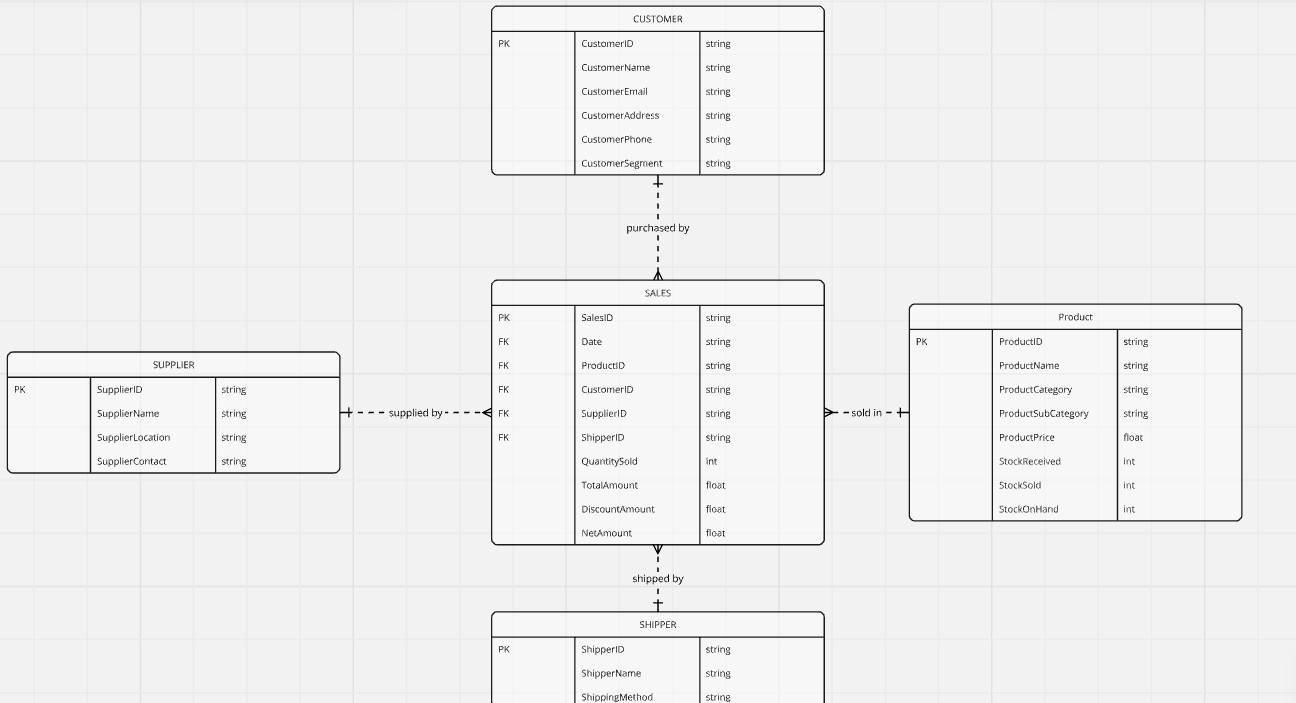

In [129]:
df.columns

Index(['Date', 'ProductName', 'ProductCategory', 'ProductSubCategory',
       'ProductPrice', 'CustomerName', 'CustomerEmail', 'CustomerAddress',
       'CustomerPhone', 'CustomerSegment', 'SupplierName', 'SupplierLocation',
       'SupplierContact', 'ShipperName', 'ShippingMethod', 'QuantitySold',
       'TotalAmount', 'DiscountAmount', 'NetAmount', 'StockReceived',
       'StockSold', 'StockOnHand'],
      dtype='object')

In [130]:
# Create Customer table
customer_df = df[['CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment']].drop_duplicates()
customer_df.insert(0, 'CustomerID', range(1, len(customer_df) + 1)) # .insert(position,column_name,what_values)
customer_df.head()


,CustomerID,CustomerName,CustomerEmail,CustomerAddress,CustomerPhone,CustomerSegment
0,1,Colleen Kelly,maryhurst@example.org,"354 Mcdowell Turnpike, Port Charles, CT 95318",908.610.2711x8507,Silver
1,2,Joel Wright,sandersvictoria@example.org,"24740 Fox Villages, New Tracie, MA 53038",+1-408-938-0389x952,Gold
2,3,Thomas Sawyer,ospence@example.net,"769 Joe Trail, East Terri, CA 43813",001-929-516-1919x39288,Gold
3,4,Tyler Gardner,christopherjohnson@example.com,"27783 Olivia Centers, Williamsmouth, AL 09809",8907712983,Gold
4,5,Meagan Peterson,epowell@example.net,"25357 Blackwell Locks, Andreabury, MH 27857",9999921886,Gold


In [165]:
import pandas as pd

def preprocess_tables(df):
    """
    Split a single DataFrame into multiple normalized tables according to the schema.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame containing all columns
    
    Returns:
    dict: Dictionary containing all created tables as DataFrames
    """
    # Create Customer table
    customer_df = df[['CustomerName', 'CustomerEmail', 'CustomerAddress', 'CustomerPhone', 'CustomerSegment']].drop_duplicates()
    customer_df.insert(0, 'CustomerID', range(1, len(customer_df) + 1))
    
    # Create Supplier table
    supplier_df = df[['SupplierName', 'SupplierLocation', 'SupplierContact']].drop_duplicates()
    supplier_df.insert(0, 'SupplierID', range(1, len(supplier_df) + 1))
    
    # Create Shipper table
    shipper_df = df[['ShipperName', 'ShippingMethod']].drop_duplicates()
    shipper_df.insert(0, 'ShipperID', range(1, len(shipper_df) + 1))
    
    # Create Product table
    product_df = df[['ProductName', 'ProductCategory', 'ProductSubCategory', 'ProductPrice',
                     'StockReceived', 'StockSold', 'StockOnHand']].drop_duplicates()
    product_df.insert(0, 'ProductID', range(1, len(product_df) + 1))
    
    # Create mapping dictionaries for foreign keys
    customer_map = dict(zip(customer_df['CustomerName'], customer_df['CustomerID']))
    supplier_map = dict(zip(supplier_df['SupplierName'], supplier_df['SupplierID']))
    shipper_map = dict(zip(shipper_df['ShipperName'], shipper_df['ShipperID']))
    product_map = dict(zip(product_df['ProductName'], product_df['ProductID']))
    
    # Create Sales table with proper foreign key mappings
    sales_df = df[['Date', 'CustomerName', 'SupplierName', 'ShipperName', 'ProductName',
                   'QuantitySold', 'TotalAmount', 'DiscountAmount', 'NetAmount']].copy()
    
    # Replace names with IDs using mapping
    sales_df['CustomerID'] = sales_df['CustomerName'].map(customer_map)
    sales_df['SupplierID'] = sales_df['SupplierName'].map(supplier_map)
    sales_df['ShipperID'] = sales_df['ShipperName'].map(shipper_map)
    sales_df['ProductID'] = sales_df['ProductName'].map(product_map)
    
    # Drop the name columns and keep only IDs
    sales_df = sales_df.drop(['CustomerName', 'SupplierName', 'ShipperName', 'ProductName'], axis=1)
    
    # Insert a SalesID as primary key
    sales_df.insert(0, 'SalesID', range(1, len(sales_df) + 1))
    
    # Return all tables in a dictionary
    return {
        'customer': customer_df,
        'supplier': supplier_df,
        'shipper': shipper_df,
        'product': product_df,
        'sales': sales_df
    }



In [167]:
def verify_data_integrity(tables):
    """
    Verify that all foreign key relationships are maintained properly.
    
    Parameters:
    tables (dict): Dictionary containing all tables
    
    Returns:
    bool: True if all relationships are valid
    """
    sales = tables['sales']
    
    # Check if all foreign keys exist in their respective tables
    customer_ids = set(tables['customer']['CustomerID'])
    supplier_ids = set(tables['supplier']['SupplierID'])
    shipper_ids = set(tables['shipper']['ShipperID'])
    product_ids = set(tables['product']['ProductID'])
    
    checks = {
        'CustomerID': all(sales['CustomerID'].isin(customer_ids)),
        'SupplierID': all(sales['SupplierID'].isin(supplier_ids)),
        'ShipperID': all(sales['ShipperID'].isin(shipper_ids)),
        'ProductID': all(sales['ProductID'].isin(product_ids))
    }
    
    return all(checks.values())

# Example usage:

# Read your DataFrame
df = pd.read_csv('ecommerce-data.csv')

# Create normalized tables
tables = preprocess_tables(df)

# Verify data integrity
is_valid = verify_data_integrity(tables)
print(f"Data integrity check passed: {is_valid}")

print(tables['product'].head())


# # Save tables to CSV files (optional)
# for table_name, table_df in tables.items():
#     # table_df.to_csv(f'{table_name}.csv', index=False)
#     print(table_name)


Data integrity check passed: True
   ProductID         ProductName  ProductCategory ProductSubCategory  \
0          1           Nathaniel      Electronics             Camera   
1          2  NonExistentProduct      Electronics             Mobile   
2          3              Angela  InvalidCategory     Action Figures   
3          4                 Amy    Home & Garden              Decor   
4          5           Nathaniel      Electronics             Camera   

  ProductPrice  StockReceived  StockSold  StockOnHand  
0         0.01            475        127          348  
1       847.43            487        243          244  
2       386.57            341        188          153  
3       364.01            500        124          376  
4       652.35            429        351           78  


## Insertion into db using SqlAlchemy for mysql connection and insertion


In [168]:
import pandas as pd
from sqlalchemy.exc import ProgrammingError
from sqlalchemy import create_engine, MetaData, Table, Column, String, Integer, Date, ForeignKey

In [169]:
from sqlalchemy import URL
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import create_engine, text

# Create a MetaData instance
metadata = MetaData()

url_object = URL.create(
    "mysql+pymysql",
    username="root",
    password="Ranjeeta1@",  # plain (unescaped) text
    host="localhost",
    database="sales_open_data", 
)



engine = create_engine(url_object)

In [170]:
# Now connect to create the database if it doesn't exist
with engine.connect() as conn:
    # Create the database if it doesn't exist
    conn.execute(text("DROP DATABASE IF EXISTS sales_open_data;"))
    conn.execute(text("CREATE DATABASE IF NOT EXISTS sales_open_data;"))
    
    # Optionally, connect to the newly created database
    conn.execute(text("USE sales_open_data;"))
    
    # Show all databases to confirm creation
    result = conn.execute(text("SHOW DATABASES;"))
    print(result.fetchall())


[('information_schema',), ('mysql',), ('performance_schema',), ('sales_data',), ('sales_data_json',), ('sales_data_json_new',), ('sales_open_data',), ('sys',)]


In [171]:
import pandas as pd
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, MetaData, DateTime, ForeignKey
from sqlalchemy.orm import sessionmaker


# Customer Table
customers = Table(
    'customers', metadata,
    Column('CustomerID', Integer, primary_key=True),
    Column('CustomerName', String(100)),
    Column('CustomerEmail', String(100)),
    Column('CustomerAddress', String(200)),
    Column('CustomerPhone', String(50)),
    Column('CustomerSegment', String(50))
)

# Supplier Table
suppliers = Table(
    'suppliers', metadata,
    Column('SupplierID', Integer, primary_key=True),
    Column('SupplierName', String(100)),
    Column('SupplierLocation', String(100)),
    Column('SupplierContact', String(100))
)

# Shipper Table
shippers = Table(
    'shippers', metadata,
    Column('ShipperID', Integer, primary_key=True),
    Column('ShipperName', String(100)),
    Column('ShippingMethod', String(50))
)

# Product Table
products = Table(
    'products', metadata,
    Column('ProductID', Integer, primary_key=True),
    Column('ProductName', String(100)),
    Column('ProductCategory', String(100)),
    Column('ProductSubCategory', String(100)),
    Column('ProductPrice', Float),
    Column('StockReceived', Float),
    Column('StockSold', Float),
    Column('StockOnHand', Float)
)

# Sales Table
sales = Table(
    'sales', metadata,
    Column('SalesID', Integer, primary_key=True),
    Column('Date', DateTime),
    Column('ProductID', Integer, ForeignKey('products.ProductID')),
    Column('CustomerID', Integer, ForeignKey('customers.CustomerID')),
    Column('SupplierID', Integer, ForeignKey('suppliers.SupplierID')),
    Column('ShipperID', Integer, ForeignKey('shippers.ShipperID')),
    Column('QuantitySold', Float),
    Column('TotalAmount', Float),
    Column('DiscountAmount', Float),
    Column('NetAmount', Float)
)

# Then try creating tables
metadata.create_all(engine)


In [172]:
# Ensure the connection is correct
with engine.connect() as conn:
    result = conn.execute(text("SELECT DATABASE();"))
    print(f"Connected to database: {result.fetchone()[0]}")  # Should be 'sales_oprn_data'




Connected to database: sales_open_data


In [173]:
from sqlalchemy import inspect

inspector = inspect(engine)

# Get list of tables
tables = inspector.get_table_names()
print("Tables in database:", tables)

# Get details of a specific table
for table in tables:
    print(f"\nStructure of table '{table}':")
    columns = inspector.get_columns(table)
    for column in columns:
        print(f"{column['name']} - {column['type']}")

Tables in database: ['customers', 'products', 'sales', 'shippers', 'suppliers']

Structure of table 'customers':
CustomerID - INTEGER
CustomerName - VARCHAR(100)
CustomerEmail - VARCHAR(100)
CustomerAddress - VARCHAR(200)
CustomerPhone - VARCHAR(50)
CustomerSegment - VARCHAR(50)

Structure of table 'products':
ProductID - INTEGER
ProductName - VARCHAR(100)
ProductCategory - VARCHAR(100)
ProductSubCategory - VARCHAR(100)
ProductPrice - FLOAT
StockReceived - FLOAT
StockSold - FLOAT
StockOnHand - FLOAT

Structure of table 'sales':
SalesID - INTEGER
Date - DATETIME
ProductID - INTEGER
CustomerID - INTEGER
SupplierID - INTEGER
ShipperID - INTEGER
QuantitySold - FLOAT
TotalAmount - FLOAT
DiscountAmount - FLOAT
NetAmount - FLOAT

Structure of table 'shippers':
ShipperID - INTEGER
ShipperName - VARCHAR(100)
ShippingMethod - VARCHAR(50)

Structure of table 'suppliers':
SupplierID - INTEGER
SupplierName - VARCHAR(100)
SupplierLocation - VARCHAR(100)
SupplierContact - VARCHAR(100)


In [174]:
type(tables)

list

In [178]:
# Create normalized tables
tables = preprocess_tables(df)
# Insert your DataFrames into the tables
product_df = tables['product']
product_df.head()

,ProductID,ProductName,ProductCategory,ProductSubCategory,ProductPrice,StockReceived,StockSold,StockOnHand
0,1,Nathaniel,Electronics,Camera,0.01,475,127,348
1,2,NonExistentProduct,Electronics,Mobile,847.43,487,243,244
2,3,Angela,InvalidCategory,Action Figures,386.57,341,188,153
3,4,Amy,Home & Garden,Decor,364.01,500,124,376
4,5,Nathaniel,Electronics,Camera,652.35,429,351,78


In [ ]:
# Insert your DataFrames into the tables
customer_df = tables['customer']
supplier_df = tables['supplier']
shipper_df = tables['shipper']
product_df = tables['product']
sales_df = tables['sales']

customer_df.to_sql('customers', engine, if_exists='append', index=False)
supplier_df.to_sql('suppliers', engine, if_exists='append', index=False)
shipper_df.to_sql('shippers', engine, if_exists='append', index=False)
product_df.to_sql('products', engine, if_exists='append', index=False)
sales_df.to_sql('sales', engine, if_exists='append', index=False)

print("Tables created and data inserted successfully!")

NameError: name 'tables' is not defined

: 